In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Read data

In [2]:
# Define locations of archives
cases = (
    #'master', 
    #'relax-irad nxrad64', 
    'master nxrad64',
    'master nxrad16',
    #'relax-irad nxrad16', 
    #'relax-irad nxrad16', 
    'mcica-for-rrtmg nxrad16',
    #'mcica-for-rrtmg nxrad64',
)
case_histories = {
    'master nxrad16': '/ccs/home/brhillman/codes/e3sm-ecp/cases/master.FSP1V1.ne30_ne30.summit_pgigpu/run',
    'master nxrad64': '/ccs/home/brhillman/codes/e3sm-ecp/cases/master.FSP1V1.ne30_ne30.summit_pgigpu.nxrad64/run',
    'relax-irad nxrad16': '/ccs/home/brhillman/codes/e3sm-ecp/cases/relax-rad-timestep.FSP1V1.ne30_ne30.summit_pgigpu/run',
    'relax-irad nxrad64': '/ccs/home/brhillman/codes/e3sm-ecp/cases/relax-rad-timestep.FSP1V1.ne30_ne30.summit_pgigpu.nxrad64/run',
    'relax-irad nxrad256': '/ccs/home/brhillman/codes/e3sm-ecp/cases/relax-rad-timestep.FSP1V1.ne30_ne30.summit_pgigpu.nxrad256/run',
    'mcica-for-rrtmg nxrad16': '/ccs/home/brhillman/codes/e3sm-ecp/cases/mcica-for-rrtmg.FSP1V1.ne30_ne30.summit_pgigpu.nxrad16/run',
    'mcica-for-rrtmg nxrad64': '/ccs/home/brhillman/codes/e3sm-ecp/cases/mcica-for-rrtmg.FSP1V1.ne30_ne30.summit_pgigpu.nxrad64/run',
}

# Read data
from glob import glob
from e3smplot.e3sm_utils import read_files
datasets = {case: read_files(sorted(glob('%s/*.cam.h0.*.nc'%(case_histories[case]))))
            for case in cases}

/ccs/home/brhillman/.conda/envs/mypython/lib/python3.7/site-packages/xarray/backends/api.py:611: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/ccs/home/brhillman/.conda/envs/mypython/lib/python3.7/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


# Map plots

PRECC mm/day
PRECC mm/day
PRECC mm/day


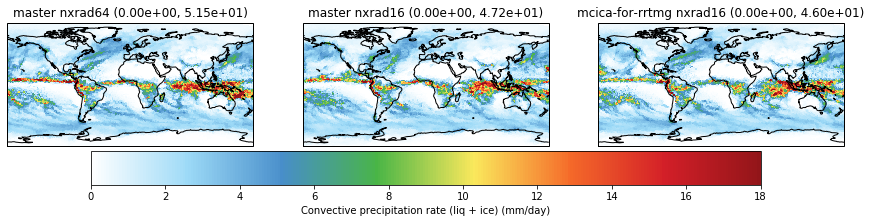

In [6]:
%matplotlib inline
import cmclimate
from e3smplot.plot_utils import compare_maps_from_ds
from e3smplot.e3sm_utils import get_data
variables = ('PRECC', )#'SWCF', 'LWCF') #('CLDTOT', 'PRECC', 'FSNT', 'FLNT', 'SWCF', 'LWCF', 'TGCLDLWP', 'TGCLDIWP')
for variable_name in variables:
    if variable_name == 'PRECC': 
        vmax = 18
        cmap = cmclimate.cm.cmaps['WhiteBlueGreenYellowRed']
    else:
        vmax = None
        cmap = 'viridis'
    datasets_list = [datasets[case] for case in cases]
    figure = compare_maps_from_ds(
        datasets_list, variable_name, 
        labels=cases, plot_diffs=(len(cases) == 2), ncols=3, nrows=1,
        label_minmax=True, vmax=vmax, cmap=cmap
    )

In [7]:
from e3smplot.e3sm_utils import get_data
d = get_data(datasets_list[0], 'PRECC')
d.attrs

OrderedDict([('units', 'mm/day'),
             ('long_name', 'Convective precipitation rate (liq + ice)'),
             ('cell_methods', 'time: mean')])

# Zonal means

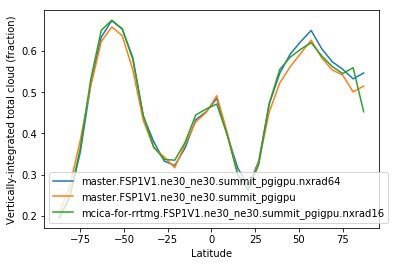

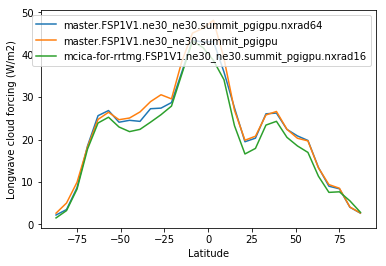

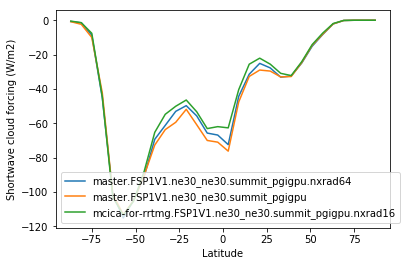

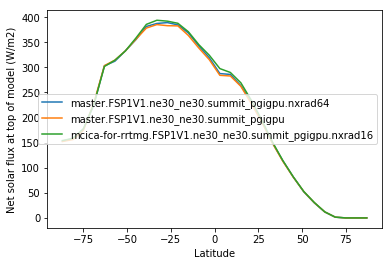

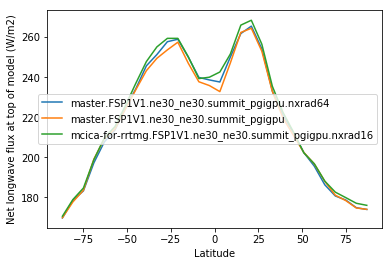

In [5]:
from e3smplot.plot_utils import compare_zonal_means
from e3smplot.plot_utils import calculate_zonal_mean
fields = ('CLDTOT', 'LWCF', 'SWCF', 'FSNT', 'FLNT',)
datasets_list = [datasets[case] for case in cases]
for field in fields:
    figure = compare_zonal_means(datasets_list, field)

# Zonal mean profiles

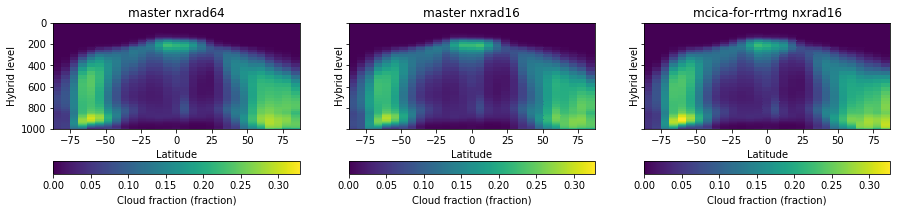

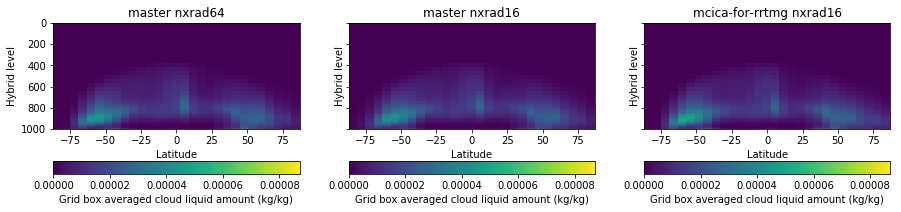

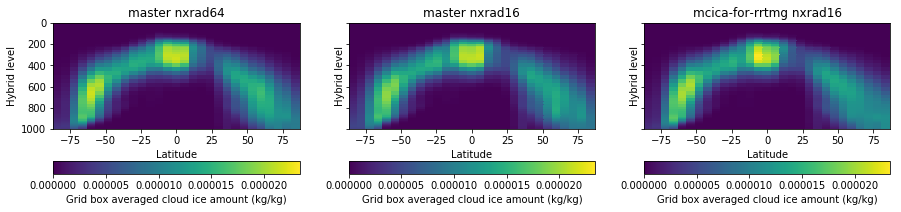

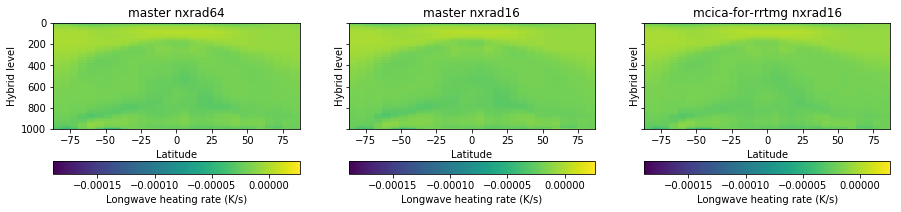

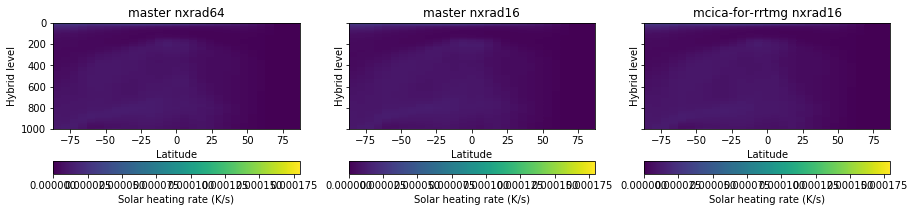

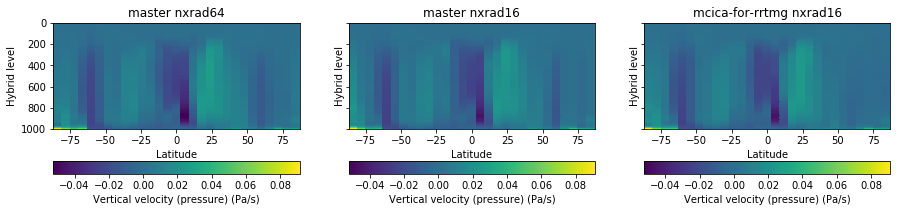

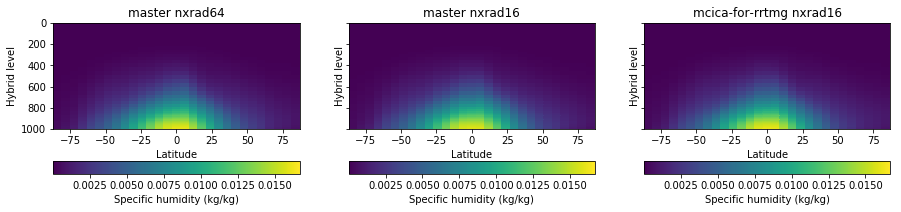

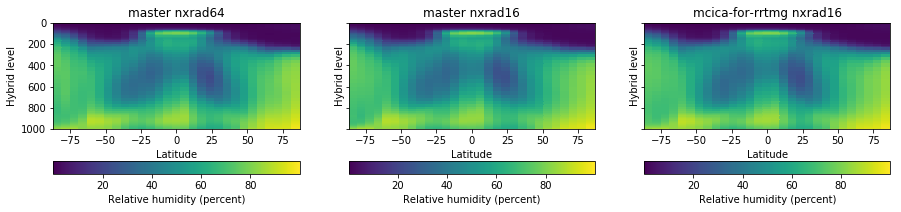

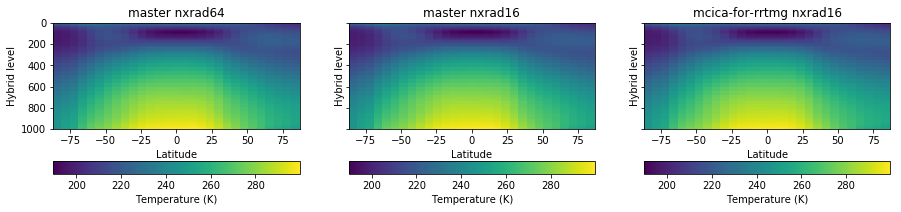

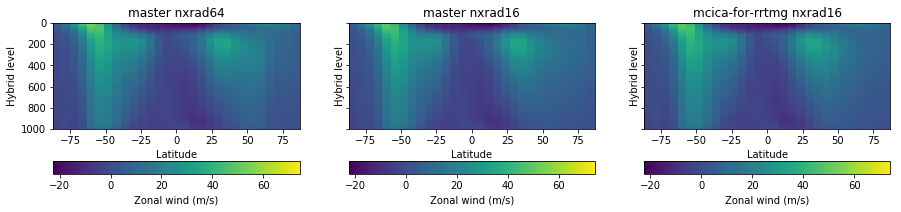

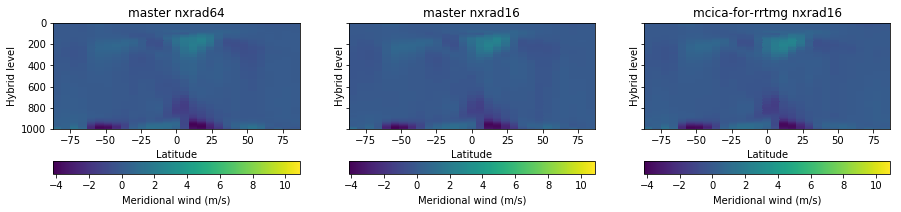

In [8]:
from e3smplot.plot_utils import compare_zonal_profiles
from e3smplot.plot_utils import calculate_zonal_mean
fields = ('CLOUD', 'CLDLIQ', 'CLDICE', 'QRL', 'QRS',
          'OMEGA', 'Q', 'RELHUM', 'T', 'U', 'V',   )
for field in fields:
    data_arrays = []
    figure = compare_zonal_profiles(
        datasets_list, field, 
        labels=cases, plot_diffs=(len(cases) == 2),
        nrows=1, ncols=3
    )

# Global mean profiles

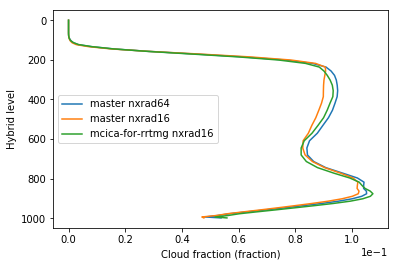

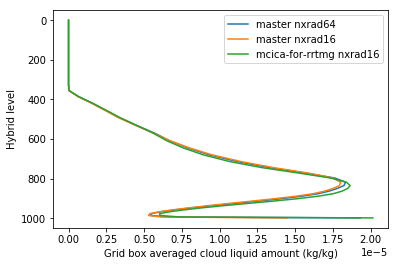

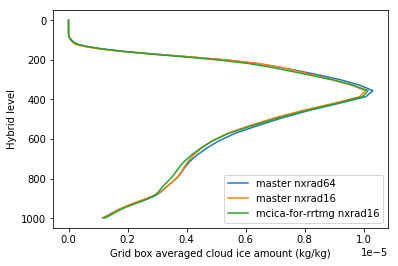

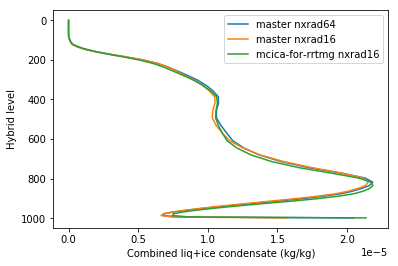

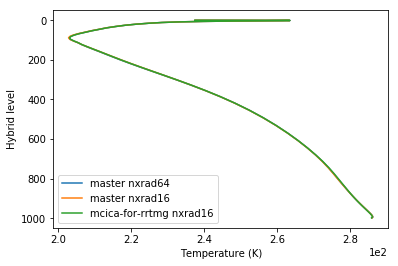

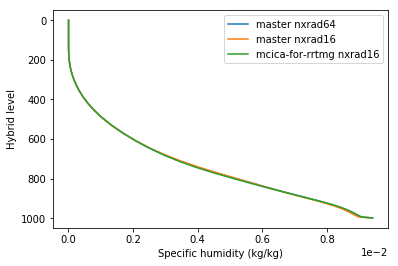

In [6]:
from matplotlib import pyplot
from e3smplot.e3sm_utils import get_data
variables = ('CLOUD', 'CLDLIQ', 'CLDICE', 'CLDLIQICE', 'T', 'Q')
for variable_name in variables:
    figure = pyplot.figure()
    ax = figure.add_subplot(111)
    for case in cases:
        data = get_data(datasets[case], variable_name)
        area = get_data(datasets[case], 'area')

        # Calculate area-weighted global average
        from e3smplot.e3sm_utils import area_average
        data_mean = area_average(data, area, dims=('ncol',))

        # Make plot
        from plot_utils import plot_profile
        pl = plot_profile(data_mean.squeeze(), data_mean.lev, label=case)
        ax.set_ylabel('Hybrid level')

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))    
    ax.legend()